In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix

In [2]:
fruits = pd.read_excel('Date_Fruit_Datasets.xlsx')

In [3]:
fruits.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091220e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


In [4]:
#somente variáveis numéricas
fruits.dtypes

AREA               int64
PERIMETER        float64
MAJOR_AXIS       float64
MINOR_AXIS       float64
ECCENTRICITY     float64
EQDIASQ          float64
SOLIDITY         float64
CONVEX_AREA        int64
EXTENT           float64
ASPECT_RATIO     float64
ROUNDNESS        float64
COMPACTNESS      float64
SHAPEFACTOR_1    float64
SHAPEFACTOR_2    float64
SHAPEFACTOR_3    float64
SHAPEFACTOR_4    float64
MeanRR           float64
MeanRG           float64
MeanRB           float64
StdDevRR         float64
StdDevRG         float64
StdDevRB         float64
SkewRR           float64
SkewRG           float64
SkewRB           float64
KurtosisRR       float64
KurtosisRG       float64
KurtosisRB       float64
EntropyRR          int64
EntropyRG          int64
EntropyRB          int64
ALLdaub4RR       float64
ALLdaub4RG       float64
ALLdaub4RB       float64
Class             object
dtype: object

# Analise da base 

<Figure size 432x432 with 0 Axes>

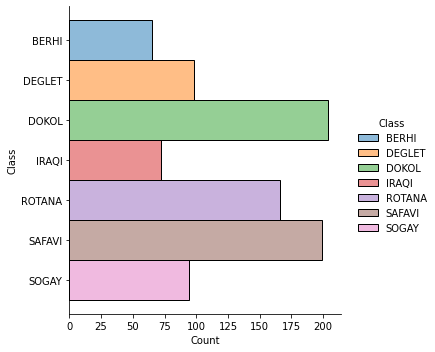

In [5]:
# Quantidade de classes de frutas
plt.figure(figsize=(6,6))
sns.displot(data=fruits, y='Class', kde=True, hue='Class')

In [6]:
#Verificando valores null
def print_nulls_columns(df):
    nulos = 0
    nulos = df[df.isna() | df.isnull()].count()
    print(nulos)
        
print_nulls_columns(fruits)

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64


C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


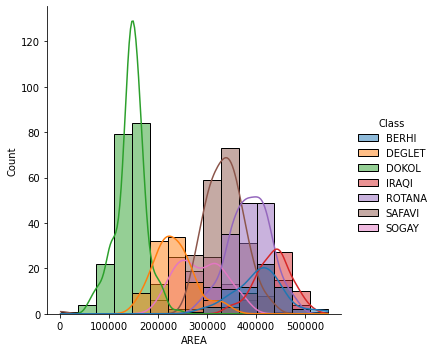

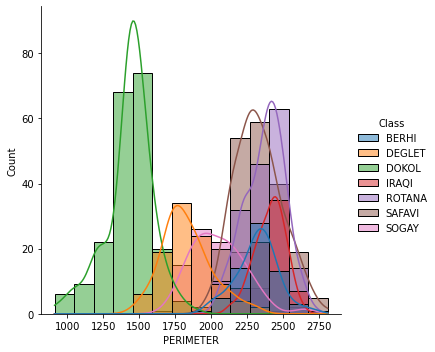

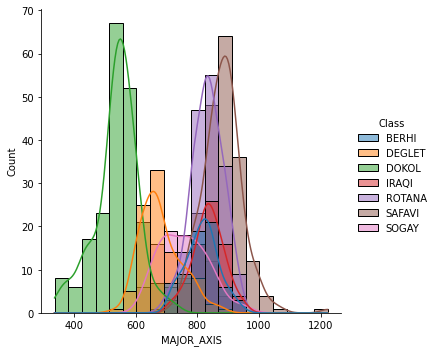

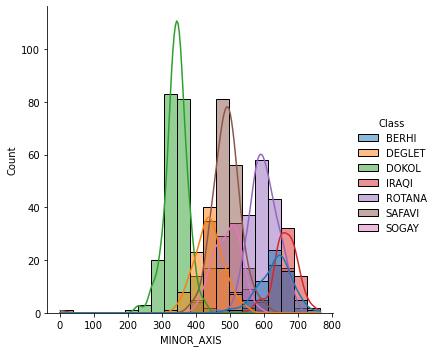

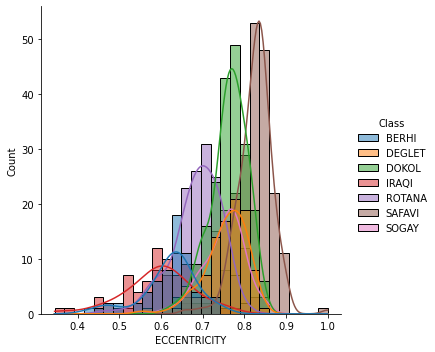

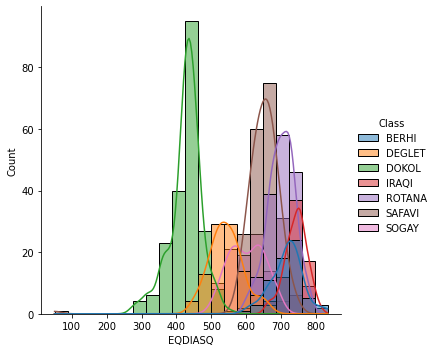

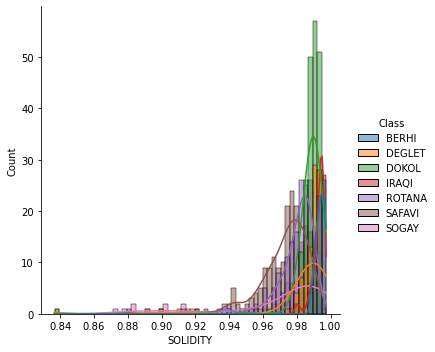

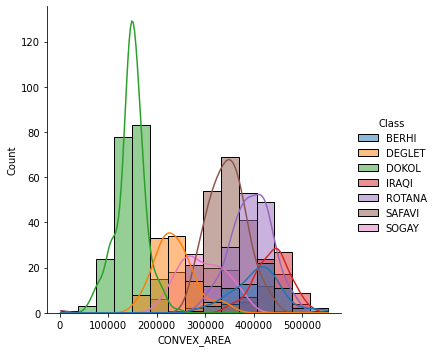

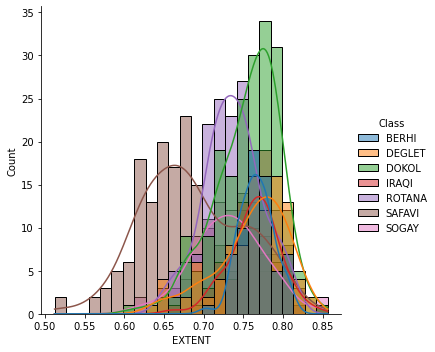

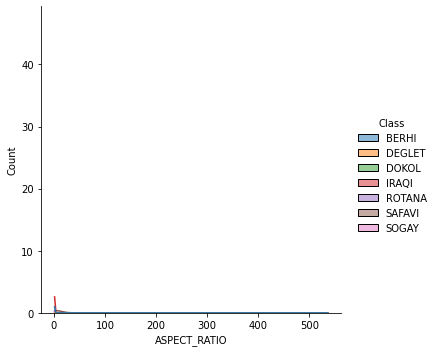

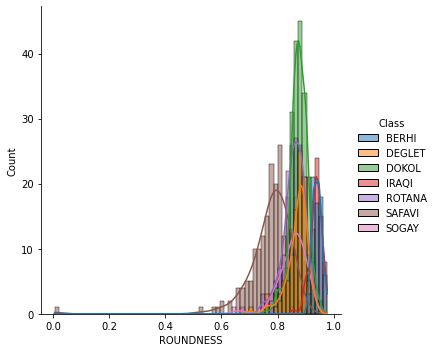

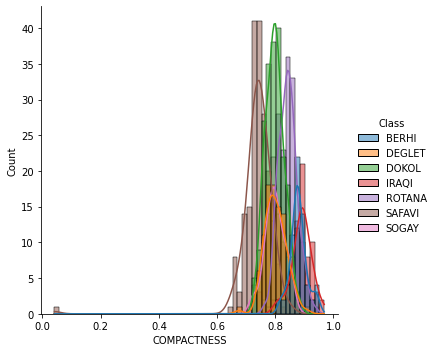

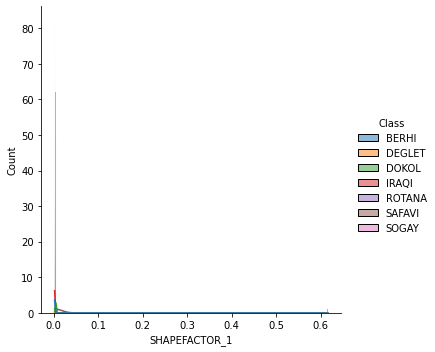

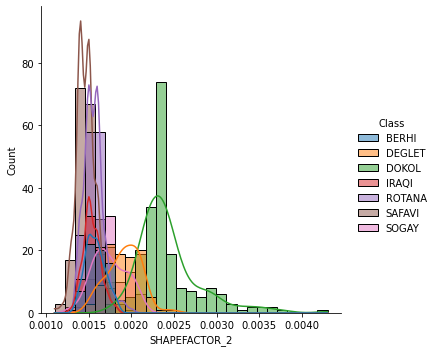

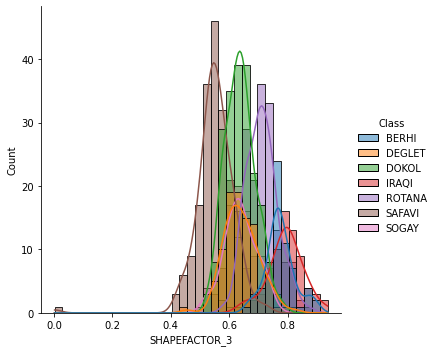

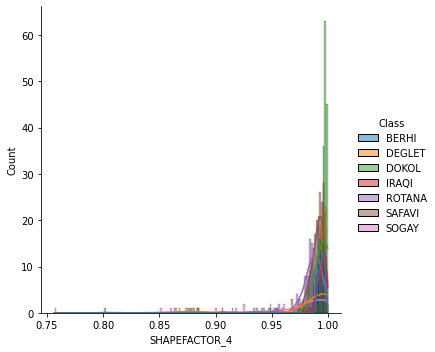

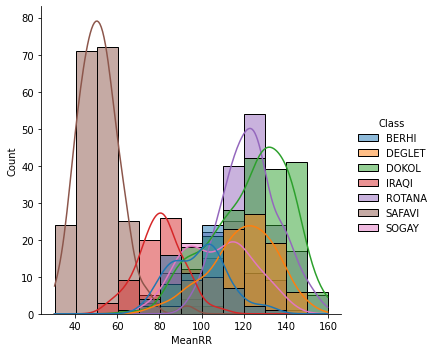

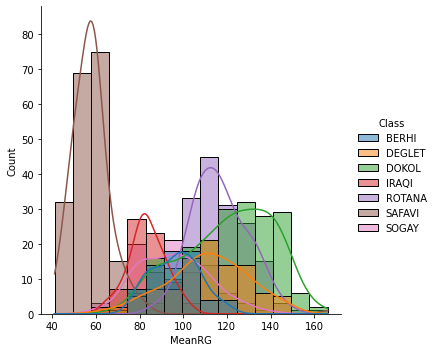

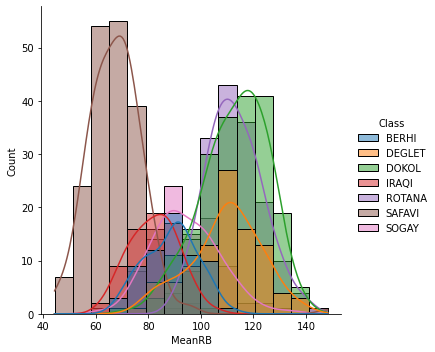

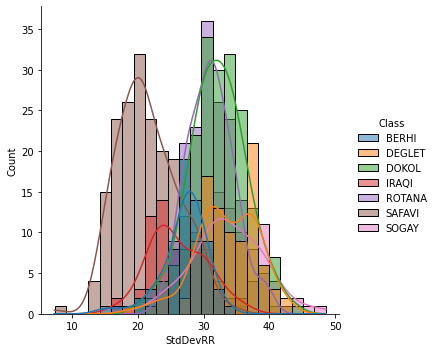

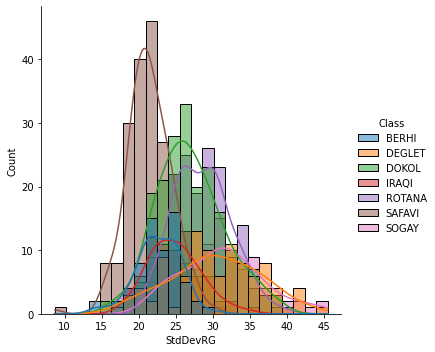

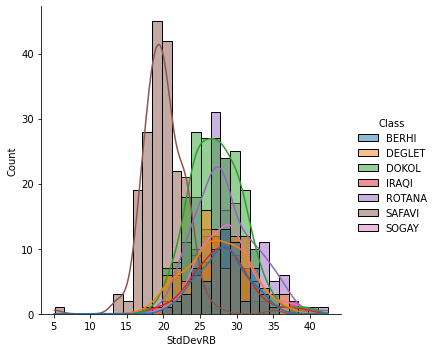

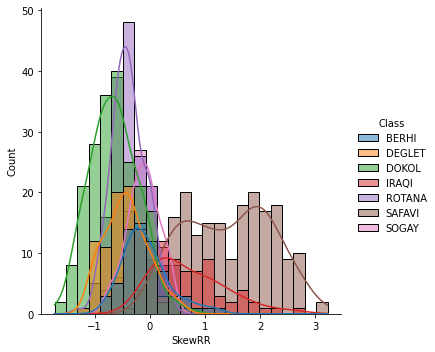

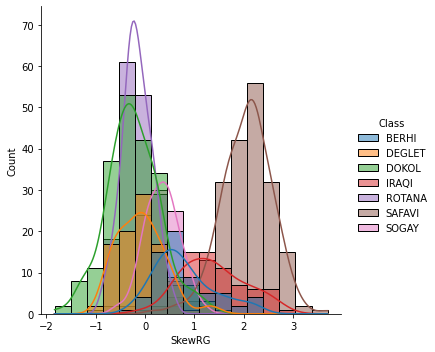

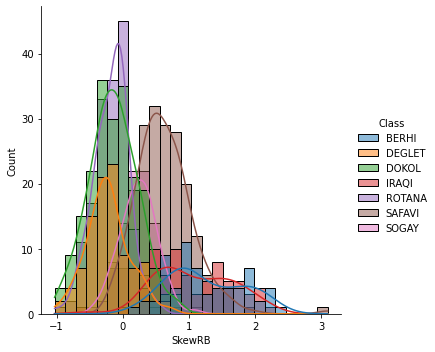

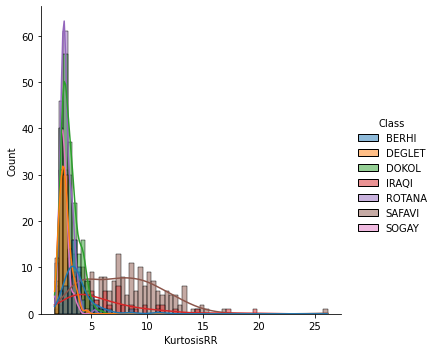

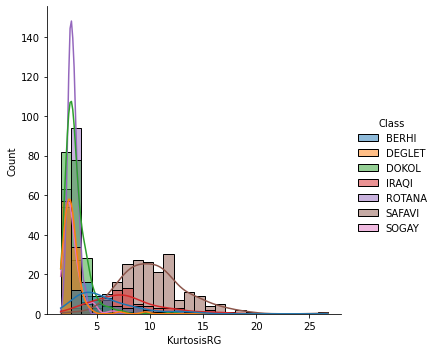

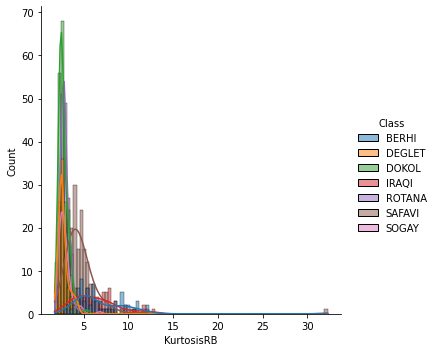

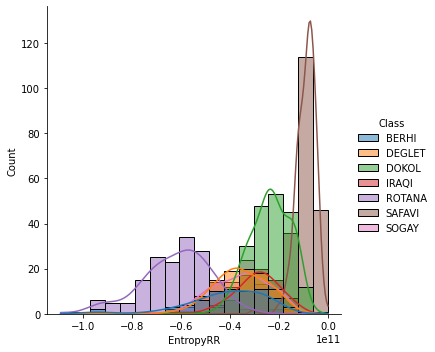

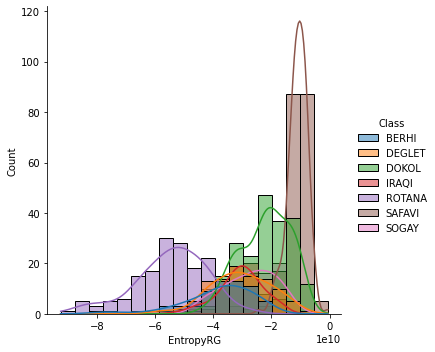

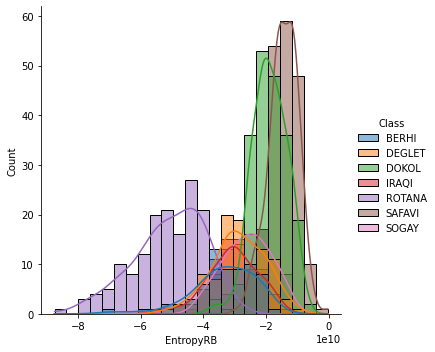

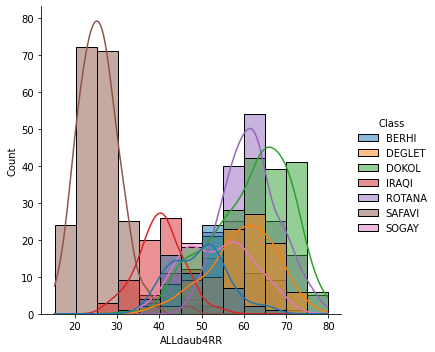

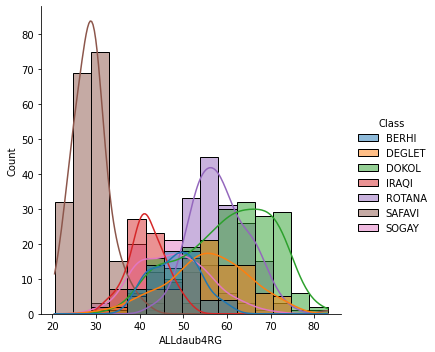

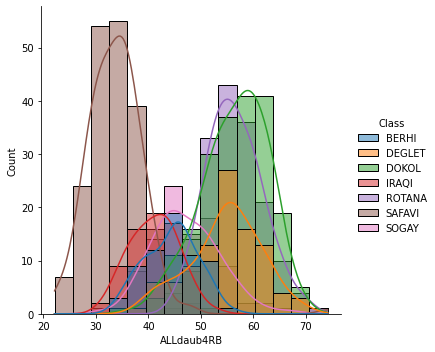

In [7]:
for col in fruits.columns.drop('Class'):
    sns.displot(data=fruits, x=col, kde=True, hue='Class')

# Visualização de Outliers

In [8]:
def ver_distribuicao(feature, column):
  fig, axes = plt.subplots(nrows=2, figsize=(8,4))
  axes[0].title.set_text(f'{column}')
  sns.boxplot(feature, ax=axes[0])
  sns.histplot(feature, kde=True, ax=axes[1])
  plt.show()

C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


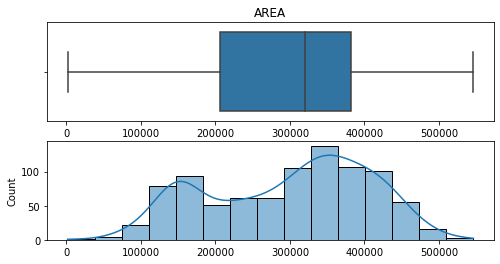

C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


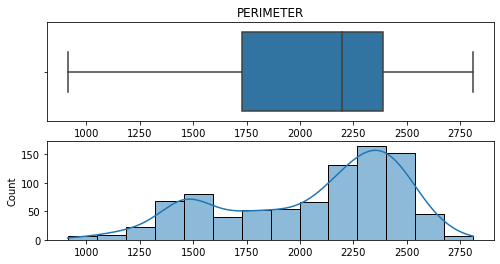

C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


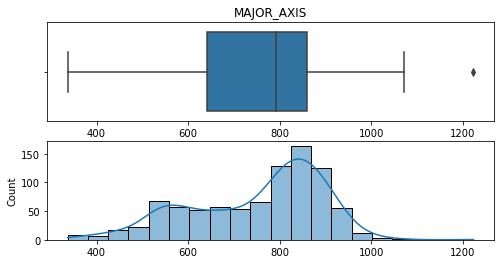

C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


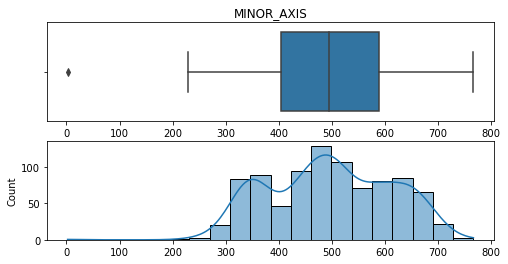

C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


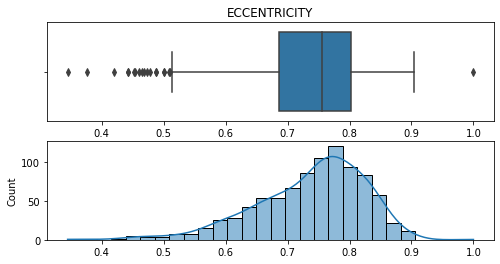

C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


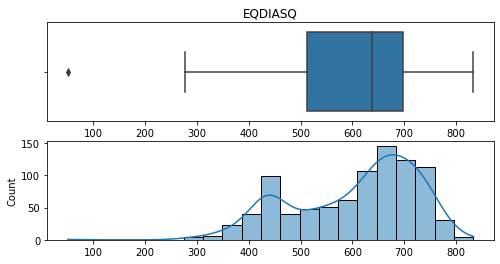

C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


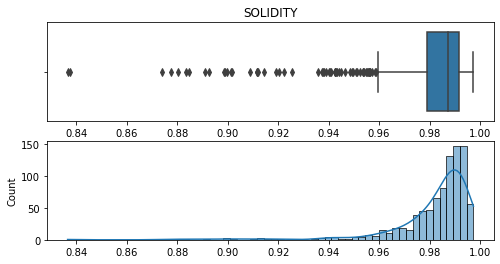

C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


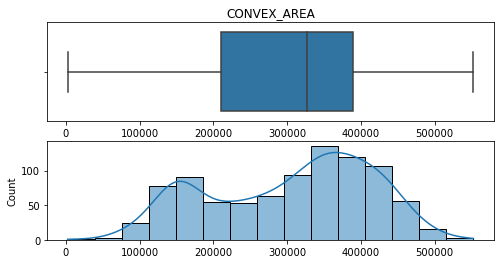

C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


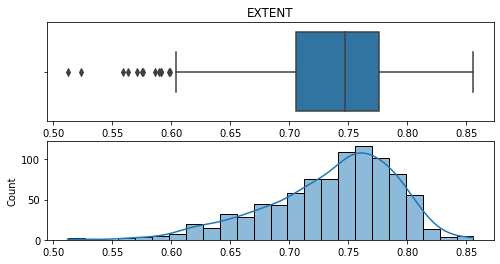

C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


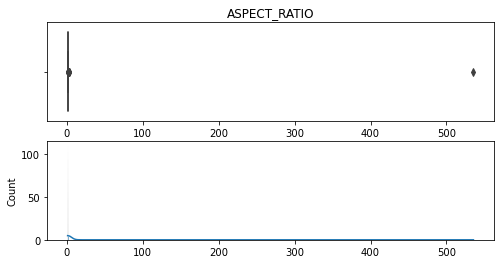

C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


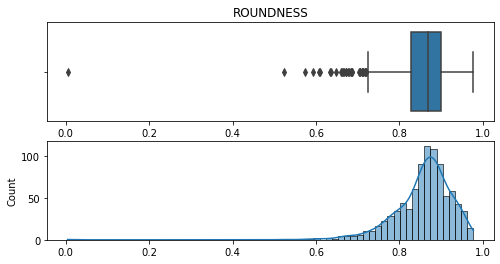

C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


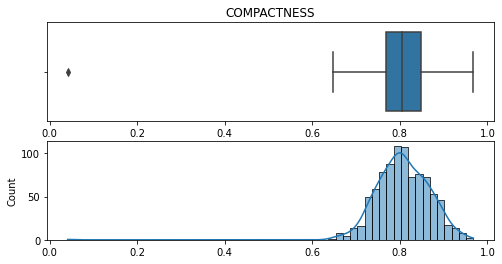

C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


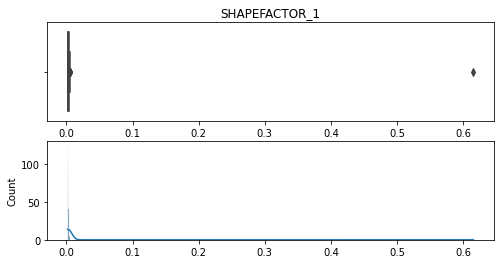

C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


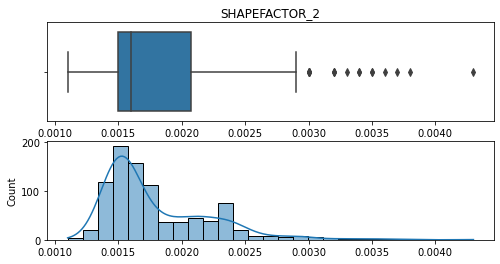

C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


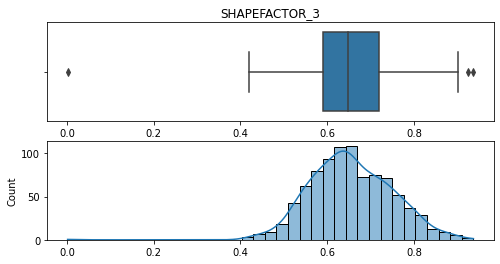

C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


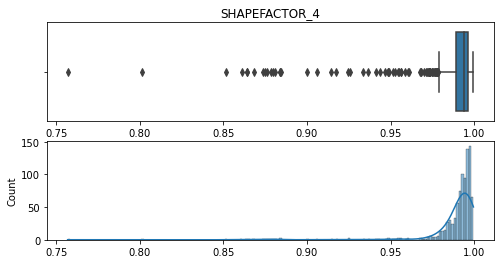

C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


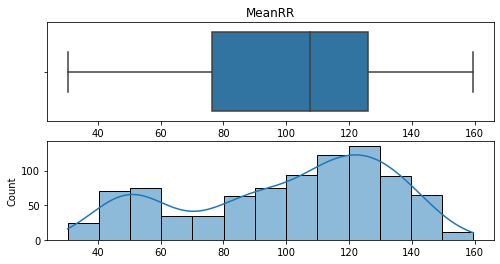

C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


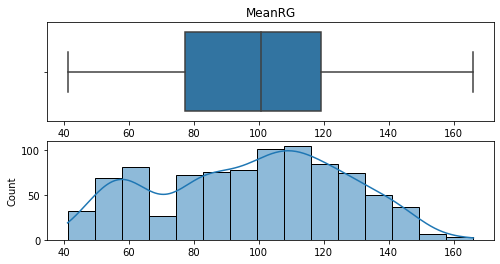

C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


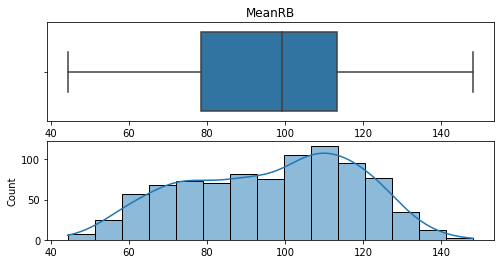

C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


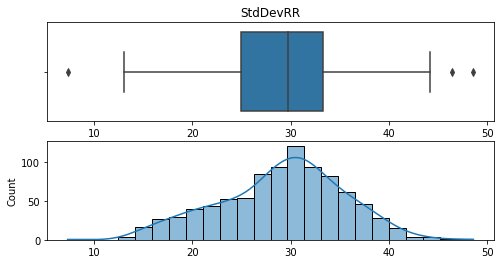

C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


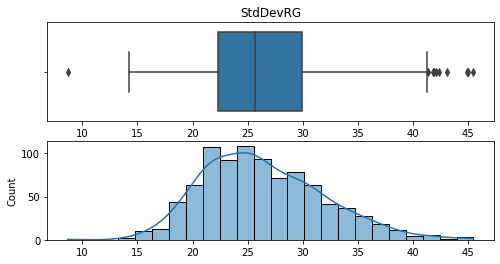

C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


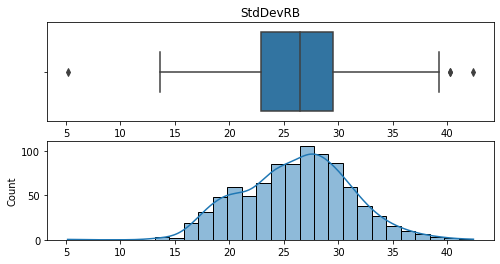

C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


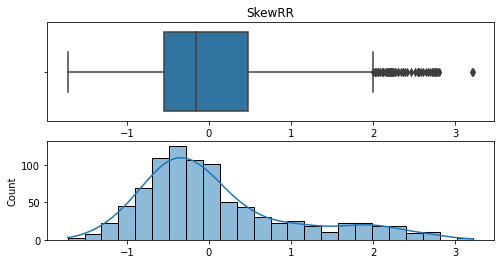

C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


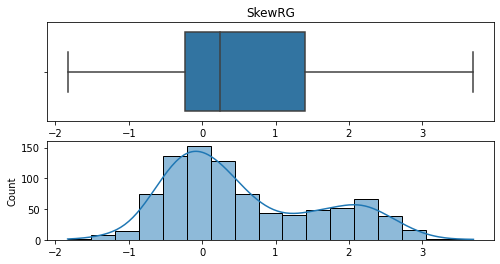

C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


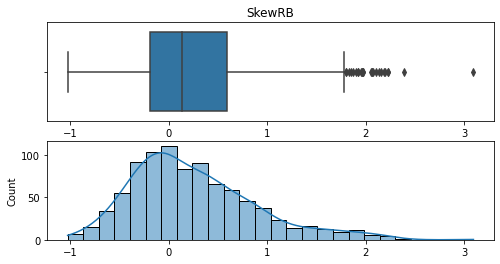

C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


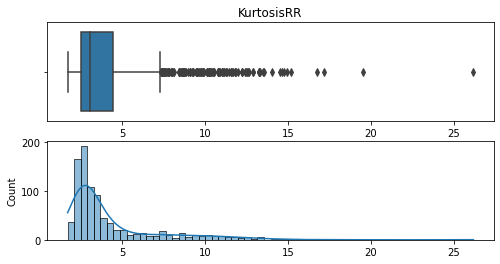

C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


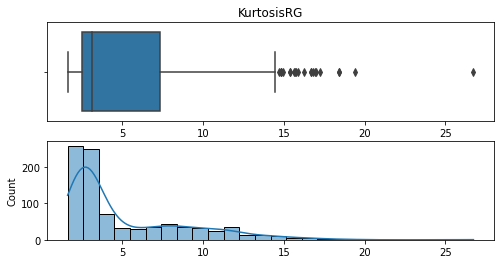

C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


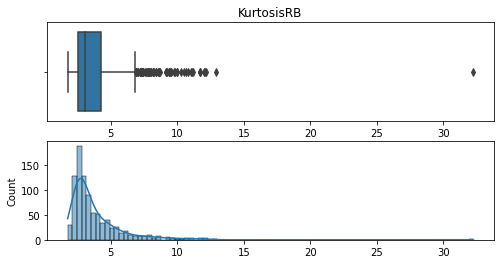

C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


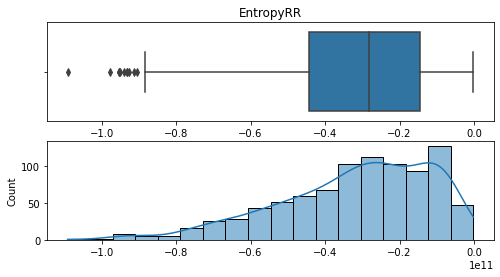

C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


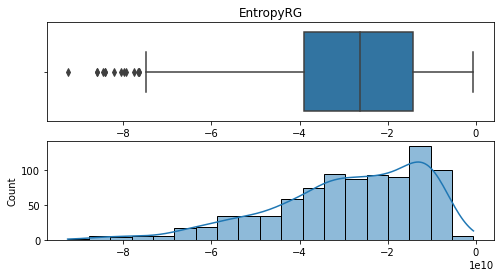

C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


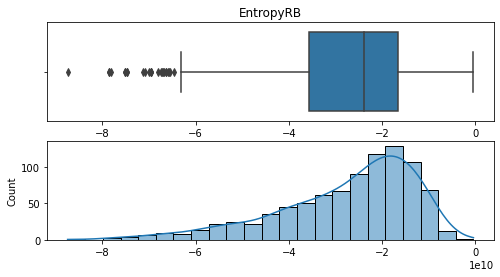

C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


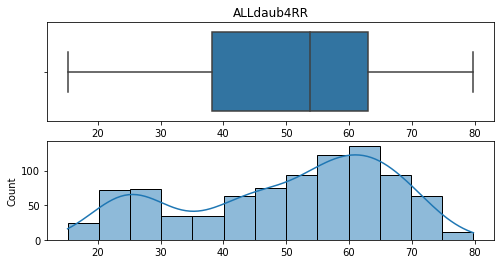

C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


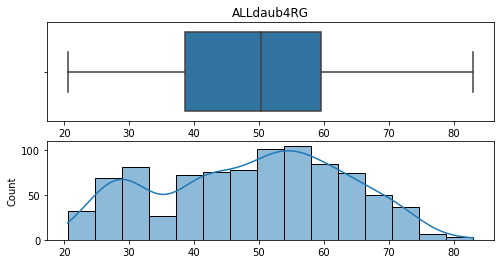

C:\Users\Philip Guedes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


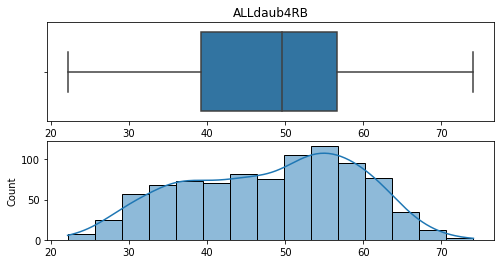

In [9]:
for column in fruits.columns.drop('Class'):
  ver_distribuicao(fruits[column].to_numpy(), column)

In [10]:
# Metodo para identificar outliers e possiveis outliers
# Retorna o index dos registros
def tukeys_method(df, variable):
    # Recebe dois parâmetros: dataframe & variável de interesse como string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    # limites internos
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    # limites externos
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss

In [11]:
# import functools as fc

In [12]:
def get_possiveis_provaveis(df):
    list_provaveis = []
    list_possiveis = []
    for column in df.columns.drop('Class'):
        provaveis_outlier , possiveis_outlier = tukeys_method(df, column)
        list_provaveis = list_provaveis + provaveis_outlier
        list_possiveis = list_possiveis + possiveis_outlier
    print("provaveis:", list_provaveis )
    print("provaveis:", list_possiveis)
    return list_provaveis, list_possiveis

In [13]:
list_provaveis_outliers, list_possiveis_outliers = get_possiveis_provaveis(fruits)

provaveis: [89, 99, 116, 128, 148, 199, 205, 262, 332, 482, 545, 615, 667, 678, 798, 809, 822, 839, 840, 841, 847, 848, 858, 861, 865, 869, 873, 878, 615, 605, 608, 615, 671, 734, 802, 615, 615, 205, 352, 615, 89, 99, 116, 128, 148, 199, 200, 205, 207, 262, 332, 440, 464, 480, 522, 545, 561, 615, 645, 697, 798, 805, 809, 811, 822, 831, 837, 839, 840, 841, 844, 847, 848, 858, 861, 865, 869, 873, 878, 889, 896, 737, 36, 368, 370, 373, 383, 385, 396, 415, 433, 609, 618, 623, 644, 646, 652, 653, 654, 655, 658, 670, 679, 689, 691, 692, 697, 704, 708, 709, 710, 713, 720, 724, 727, 730, 731, 732, 733, 737, 740, 743, 756, 758, 766, 769, 770, 771, 772, 777, 778, 780, 781, 784, 785, 786, 787, 795, 797, 803, 737, 20, 21, 29, 31, 36, 39, 43, 44, 51, 53, 61, 373, 380, 383, 385, 396, 406, 415, 433, 704, 737, 778]
provaveis: [615, 615, 22, 25, 30, 34, 38, 49, 367, 373, 374, 378, 384, 385, 395, 397, 431, 434, 473, 552, 615, 615, 89, 99, 116, 128, 148, 199, 205, 207, 262, 332, 440, 464, 477, 480, 482, 

# Observando correlação entre as colunas

Text(0.5, 1.0, 'Correlação do dataset fruits')

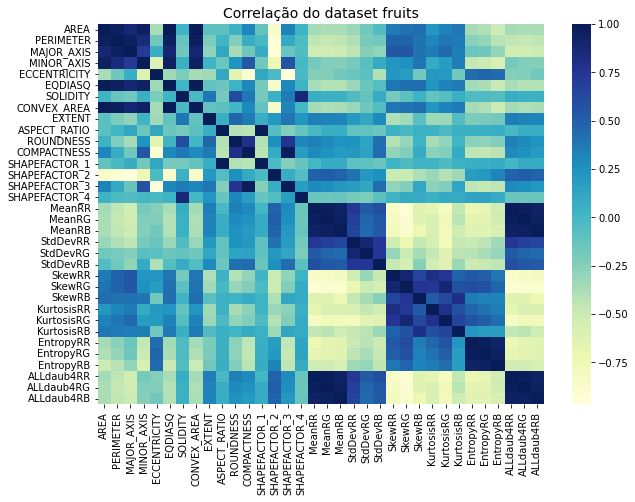

In [14]:
fig, ax = plt.subplots(figsize=(10,7))

corr_after = fruits.corr()
sns.heatmap(corr_after, cmap='YlGnBu')
ax.set_title("Correlação do dataset fruits", fontsize=14)

# Conclusões após análises
    - Não temos registros nulos
    - Precisamos normalizar as variáveis
    - Após aplicar o método de Tukey, é notável que existem alguns outliers
    - Existem variáveis bastante correlatas, aplicar o PCA para essas colunas.

# Próximos passos
    - 1º Tirar outliers
    - 2º Tirar variáveis correlatas (PCA?)
    - 3º Normalizar a base.

# Retirando outliers

In [15]:
fruits

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.4109,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,2.6769,2.6874,2.7991,-26048595968,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY


In [16]:
df_indexes_outliers = fruits.index[list_provaveis_outliers]
fruits.drop(df_indexes_outliers, inplace=True)
fruits

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,313194,2095.9231,769.1030,519.8459,0.7370,631.4832,0.9905,316201,0.7231,1.4795,...,2.1584,2.1710,2.3135,-28769253376,-24705204224,-23276603392,47.2951,43.8257,43.2458,SOGAY
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.4109,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY


In [17]:
fruits = fruits.reset_index(drop=True)
fruits.iloc[:,:]

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,313194,2095.9231,769.1030,519.8459,0.7370,631.4832,0.9905,316201,0.7231,1.4795,...,2.1584,2.1710,2.3135,-28769253376,-24705204224,-23276603392,47.2951,43.8257,43.2458,SOGAY
775,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
776,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.4109,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
777,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY


# Tirando features correlatas

In [18]:
fruits = fruits.drop(['CONVEX_AREA', 'MINOR_AXIS', 'MAJOR_AXIS', 'PERIMETER', 'EQDIASQ', 'SHAPEFACTOR_2',
               'SHAPEFACTOR_3', 'MeanRR', 'MeanRG', 'StdDevRR', 'SkewRR', 'SkewRG', 
               'KurtosisRR', 'KurtosisRG', 'EntropyRR', 'EntropyRG', 'ALLdaub4RR', 'ALLdaub4RB',
               'ALLdaub4RG', 'ECCENTRICITY', 'StdDevRB', 'SHAPEFACTOR_1', 'ASPECT_RATIO'], axis=1)

In [19]:
X , y = fruits.drop('Class', axis=1), fruits.iloc[:,-1:]

# Train test split da base

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

# Normalização da base

In [21]:
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler, PowerTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from imblearn.over_sampling import SMOTE

normalizer = PowerTransformer(method='box-cox')
scaler = MinMaxScaler(feature_range=(1, 2))
over_sampler = SMOTE(random_state=0)
prepr_pipe = Pipeline([
                 ('scaler', scaler), 
                 ('normalizer', normalizer),
                 ('resampler', over_sampler)
                ])

test_pipe = Pipeline([
                 ('scaler', scaler), 
                 ('normalizer', normalizer)
                ])

In [22]:
X_train, y_train = prepr_pipe.fit_resample(X_train, y_train)
X_test = test_pipe.fit_transform(X_test, y_test)

## Normalização da base de treino

In [23]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler
# column_transf = ColumnTransformer([
#         ('scaler', StandardScaler(), X.columns)
#     ], remainder='passthrough')

# X_train = column_transf.fit_transform(X_train)
# X_train = pd.DataFrame(X_train, columns= X.columns)
# X_train.shape

## Normalização da base de teste

In [24]:
# X_test = column_transf.transform(X_test)
# X_test = pd.DataFrame(X_test, columns= X.columns)
# X_test.shape

# Treinando o modelo

In [25]:
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform, randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.model_selection import RandomizedSearchCV

In [27]:
def train_cv(model, X_train, y_train, params, n_splits=10):
  kf = KFold(n_splits=n_splits, random_state=0, shuffle=True)

  cv = RandomizedSearchCV(model,
                        params,
                        cv=kf,
                        scoring='roc_auc',
                        return_train_score=True,
                        n_jobs=-1,
                        verbose=True,
                        random_state=1
                        )
  cv.fit(X_train, y_train)

  print('Best params', cv.best_params_)
  return cv

# KNN

In [28]:
kf = KFold(n_splits=10, random_state=0, shuffle=True)
rs_parameters = {
    'n_neighbors': randint(10, 20),
    'weights': ['uniform', 'distance'],
    'leaf_size': randint(2, 10)
    }

knn = KNeighborsClassifier(n_jobs=-1)

model_cv_knn = train_cv(knn, X_train, y_train, rs_parameters)
bestmodel_knn = model_cv_knn.best_estimator_

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best params {'leaf_size': 7, 'n_neighbors': 18, 'weights': 'distance'}


C:\Users\Philip Guedes\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\Philip Guedes\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the train scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\Philip Guedes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [29]:
pd.DataFrame(model_cv_knn.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.007900,0.000944,0.004000,0.001342,7,18,distance,"{'leaf_size': 7, 'n_neighbors': 18, 'weights':...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.008199,0.001470,0.002300,0.001677,3,15,distance,"{'leaf_size': 3, 'n_neighbors': 15, 'weights':...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.007700,0.001418,0.003511,0.001498,2,10,distance,"{'leaf_size': 2, 'n_neighbors': 10, 'weights':...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.008589,0.002151,0.003700,0.001418,6,17,distance,"{'leaf_size': 6, 'n_neighbors': 17, 'weights':...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.007900,0.000943,0.003600,0.000799,6,16,distance,"{'leaf_size': 6, 'n_neighbors': 16, 'weights':...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.008200,0.000748,0.004400,0.001020,4,14,uniform,"{'leaf_size': 4, 'n_neighbors': 14, 'weights':...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.008900,0.001868,0.004600,0.001200,7,12,uniform,"{'leaf_size': 7, 'n_neighbors': 12, 'weights':...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.008000,0.000775,0.005200,0.000748,5,12,uniform,"{'leaf_size': 5, 'n_neighbors': 12, 'weights':...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.007400,0.000800,0.005100,0.000943,9,17,distance,"{'leaf_size': 9, 'n_neighbors': 17, 'weights':...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.008100,0.000943,0.003809,0.000963,3,17,uniform,"{'leaf_size': 3, 'n_neighbors': 17, 'weights':...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
from sklearn.metrics import roc_curve
from sklearn import metrics

ypred = bestmodel_knn.predict(X_test)
y_scores = bestmodel_knn.predict_proba(X_test)

fpr, tpr, _ = metrics.roc_curve(y_test,  y_scores)

ValueError: multiclass format is not supported

In [43]:
pd.DataFrame(y_scores)

,0,1,2,3,4,5,6
0,0.000000,0.000000,0.000000,0.000000,0.765560,0.000000,0.234440
1,0.711071,0.000000,0.000000,0.288929,0.000000,0.000000,0.000000
2,0.000000,0.157133,0.842867,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.114915,0.301592,0.000000,0.000000,0.308396,0.275097
4,0.000000,0.433396,0.515839,0.000000,0.000000,0.000000,0.050765
...,...,...,...,...,...,...,...
253,0.000000,0.166372,0.000000,0.000000,0.142461,0.000000,0.691167
254,0.000000,0.078038,0.000000,0.000000,0.000000,0.921962,0.000000
255,0.431227,0.000000,0.000000,0.568773,0.000000,0.000000,0.000000
256,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000


In [44]:
y_test

,Class
408,ROTANA
43,BERHI
329,DOKOL
302,DOKOL
175,DOKOL
...,...
711,SOGAY
565,SAFAVI
379,IRAQI
492,ROTANA


In [1]:
print(roc_auc_score(y_test, ypred_proba, multi_class='ovr'))
print(classification_report(y_test, ypred))

NameError: name 'roc_auc_score' is not defined

# Logistic Regression